# Customer Churn Analysis

**Author:** Shayan Ahmed Malik

---

## Introduction

Customer churn is a critical metric for subscription-based businesses. This analysis aims to identify key drivers of churn and build predictive models to help the business retain valuable customers.

## Business Problem Statement

The goal is to analyze customer data to understand the factors that contribute to churn and to develop a model that can predict which customers are likely to leave. This will enable the business to take proactive measures to improve customer retention.

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

I used the Telco Customer Churn dataset, which contains 7,043 customer records and 21 features, including demographic information, account details, and churn status.

In [215]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [216]:
print(data.shape)
print(data.columns)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Data Cleaning & Preprocessing

We check for missing values, convert data types, and handle duplicates to ensure data quality.

In [217]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data["SeniorCitizen"] = data["SeniorCitizen"].map({1: "Yes", 0: "No"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
data.dropna(inplace=True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [219]:
data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

We explore the distribution of churn, tenure, monthly charges, and other key features. Visualizations help us understand the data and spot trends.

Chrun rate is: 27 %



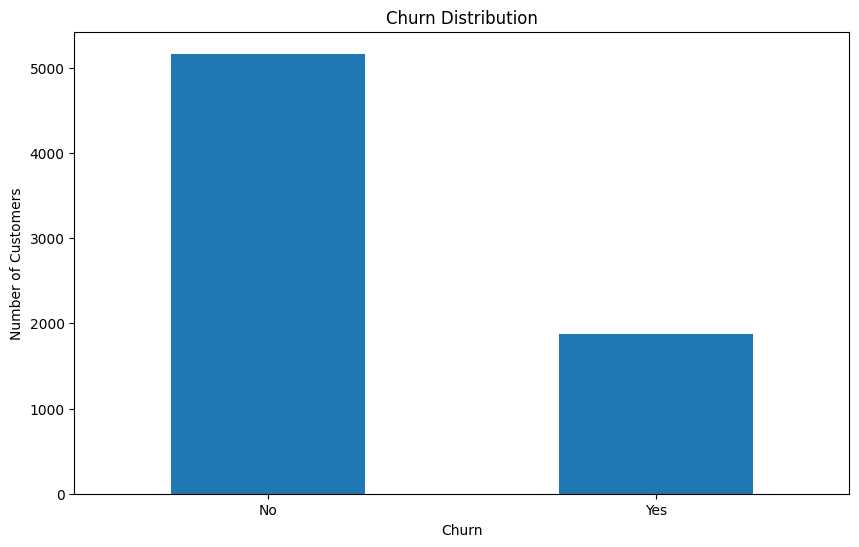

In [220]:
count = data["Churn"].value_counts()
plt.figure(figsize=(10,6))
count.plot(kind = "bar")
plt.title("Churn Distribution")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)

churn_rate = ((data["Churn"] == "Yes").sum() / data.shape[0]) * 100
print("Chrun rate is:",round(churn_rate),"%\n")
plt.show()

**Insight:**  
About 27% of customers in the dataset have churned, indicating a significant retention challenge.

In [221]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [222]:
data.describe(exclude="number")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Text(0.5, 1.0, 'Boxplot for Tenure Column')

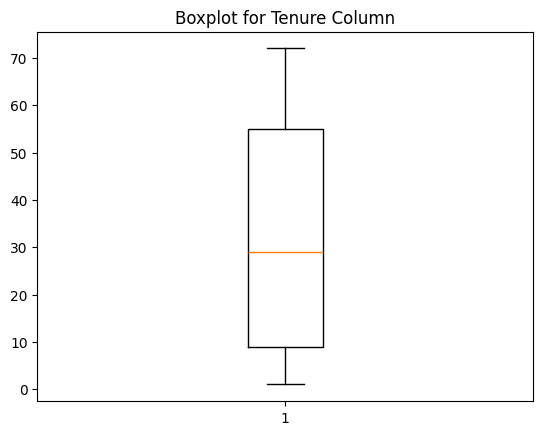

In [223]:
plt.boxplot(data["tenure"])
plt.title("Boxplot for Tenure Column")

**Insight:**  
The tenure variable does not show significant outliers, indicating a relatively even distribution of customer tenures.

Text(0.5, 1.0, 'Distribution of Tenure')

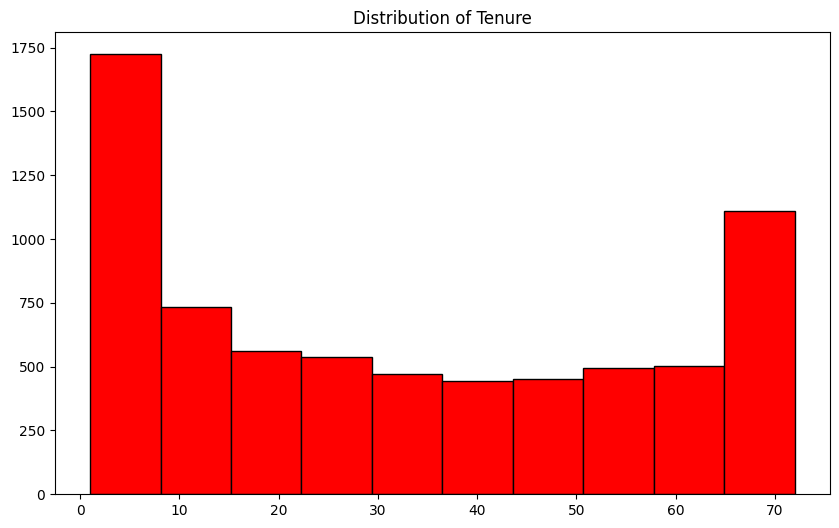

In [224]:
plt.figure(figsize=(10,6))
plt.hist(data["tenure"],color = "red",edgecolor="black")
plt.title("Distribution of Tenure")

**Insight:**  
Most customers have a short tenure, with the number of customers decreasing as tenure increases. This suggests many customers are relatively new.

Text(0.5, 1.0, 'Boxplot for MonthlyCharges Column')

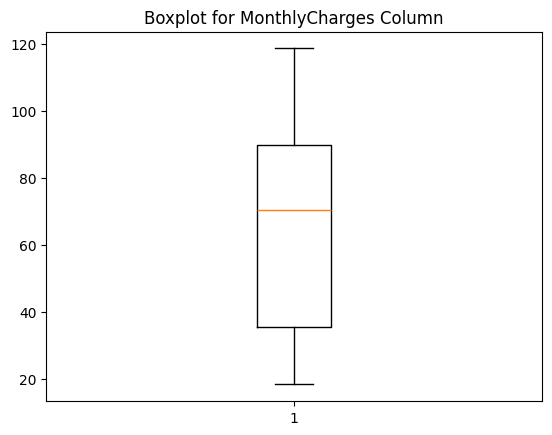

In [225]:
plt.boxplot(data["MonthlyCharges"])
plt.title("Boxplot for MonthlyCharges Column")

**Insight:**  
Monthly charges show a wider spread, with some higher values but no extreme outliers.

Text(0.5, 1.0, 'Distribution of Monthly Charges')

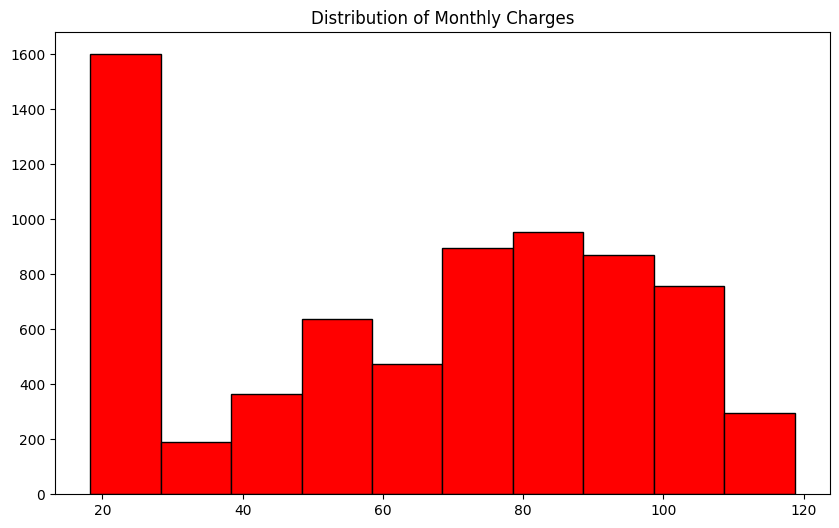

In [226]:
plt.figure(figsize=(10,6))
plt.hist(data["MonthlyCharges"],color = "red",edgecolor = "black")
plt.title("Distribution of Monthly Charges")

**Insight:**  
Monthly charges are right-skewed, with most customers paying between $20 and $80 per month.

In [227]:
lower = data["TotalCharges"].quantile(0.25)
upper = data["TotalCharges"].quantile(0.75)
IQR = upper - lower
lower = lower - (1.5 * IQR)
upper = upper + (1.5 * IQR)
outliers = data[(data["TotalCharges"] > upper) | (data["TotalCharges"] < lower)]
outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Text(0.5, 1.0, 'Distribution of Total Charges')

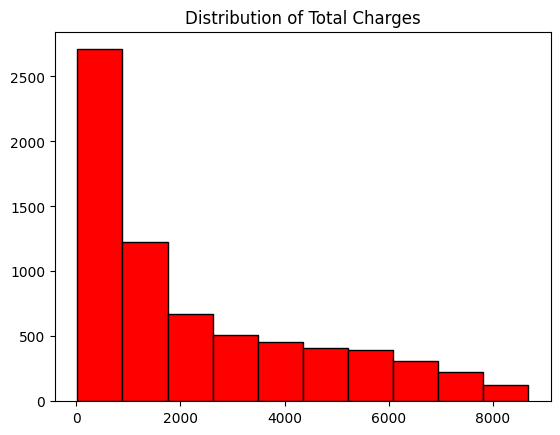

In [228]:
plt.hist(data["TotalCharges"],color = "red",edgecolor = "black")
plt.title("Distribution of Total Charges")

**Insight:**  
Total charges are heavily right-skewed, as expected, since most customers have not been with the company for a long time.

**Summary of Insights:**  
Customers who churn tend to have higher monthly charges and shorter tenure.

In [229]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

**Insight:**  
The majority of customers use either fiber optic or DSL internet, with a smaller portion having no internet service.

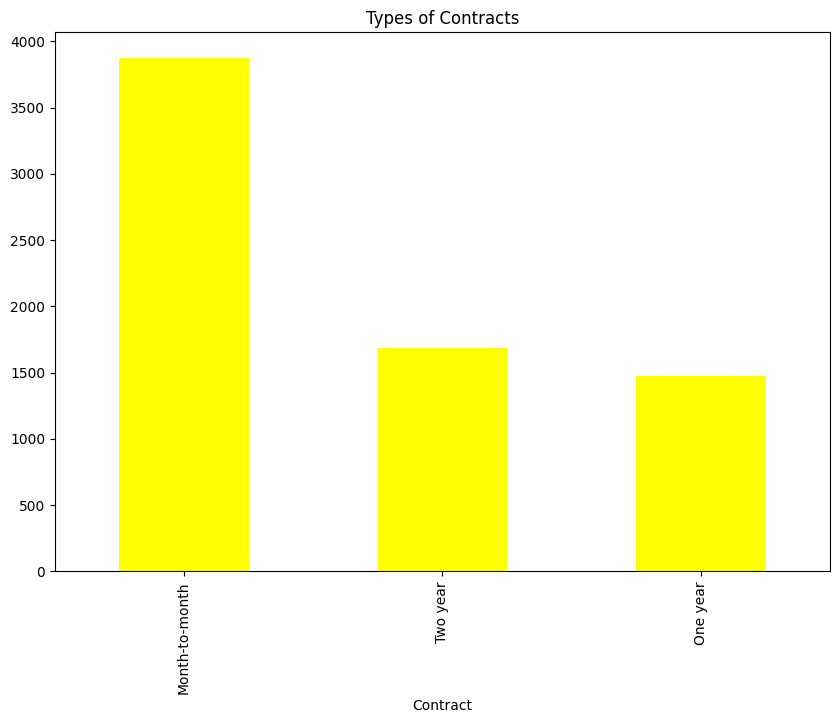

In [230]:
contract = data["Contract"].value_counts()
plt.figure(figsize=(10,7))
contract.plot(kind = "bar",color = "yellow")
plt.title("Types of Contracts")
plt.show()

**Insight:**  
Month-to-month contracts are the most common, which may contribute to higher churn rates due to lower customer commitment.

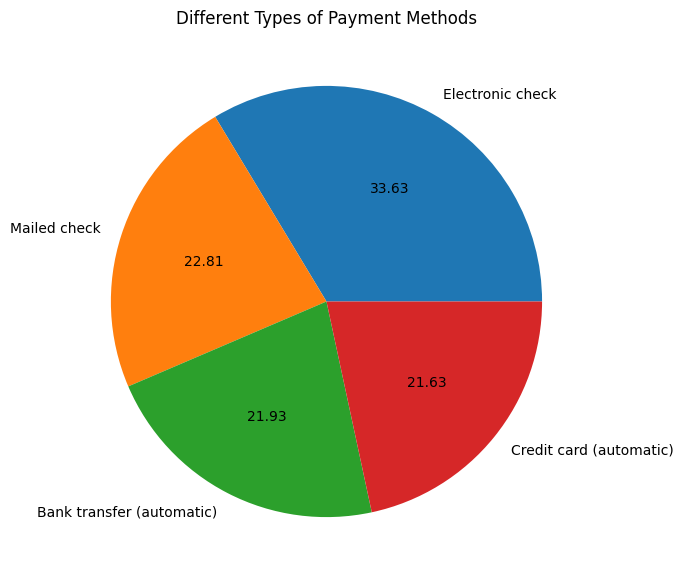

In [231]:
method = data["PaymentMethod"].value_counts()
plt.figure(figsize=(10,7))
plt.pie(method.values,labels=method.index,autopct="%1.2f")
plt.title("Different Types of Payment Methods")
plt.show()


**Insight:**  
Electronic check is the most popular payment method, followed by mailed check and bank transfer.

Text(0.5, 1.0, 'Distribution of Monthly Charges for Churn and No-Churn Customers')

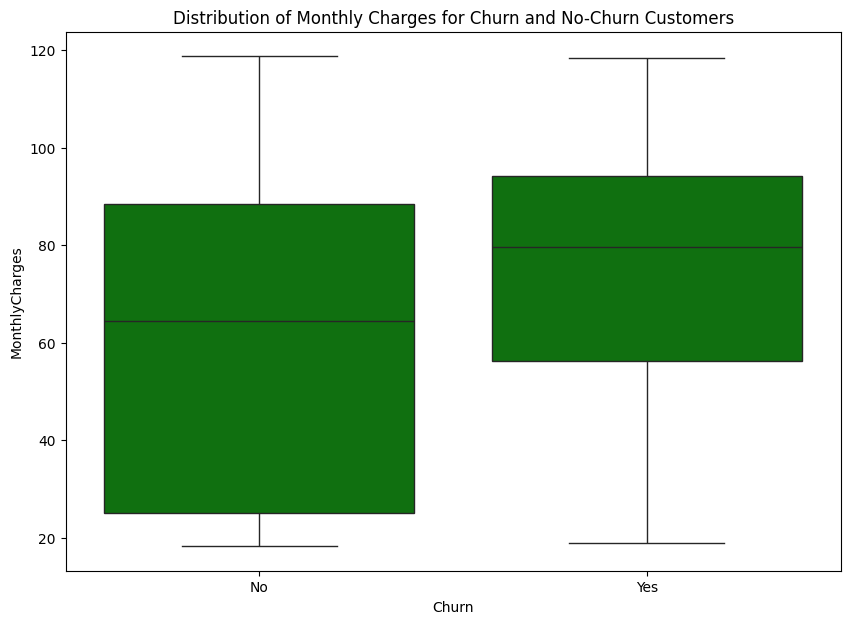

In [232]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data["Churn"], y= data["MonthlyCharges"],color = "green")
plt.title("Distribution of Monthly Charges for Churn and No-Churn Customers")

**Insight:**  
Customers who churn tend to have higher monthly charges compared to those who stay.

Text(0.5, 1.0, 'Distribution of Tenure period of Churn and No Churn Customers')

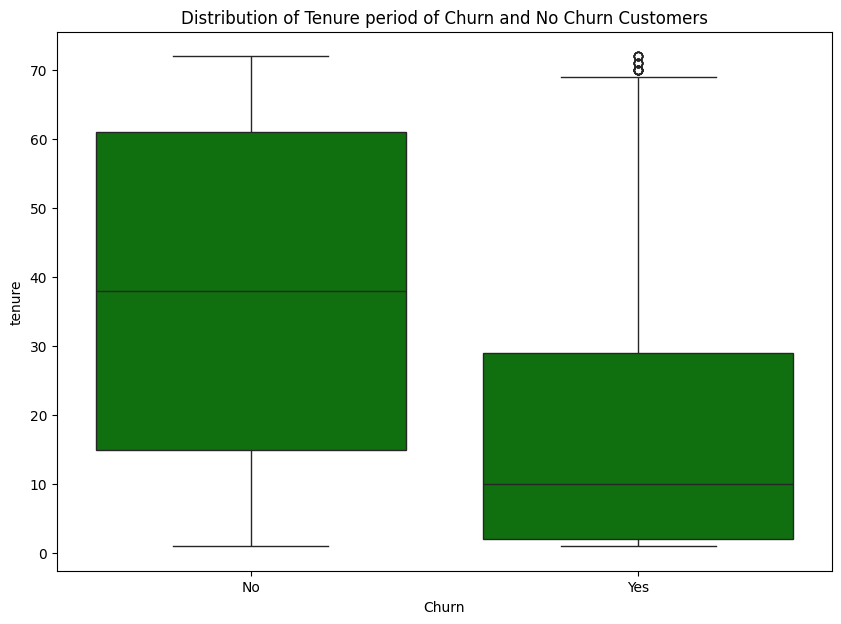

In [233]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data["Churn"], y= data["tenure"],color = "green")
plt.title("Distribution of Tenure period of Churn and No Churn Customers")

**Insight:**  
Customers who churn generally have a much shorter tenure than those who do not churn.

In [234]:
cust = data[data["Churn"] == "Yes"]
lower = cust["tenure"].quantile(0.25)
upper = cust["tenure"].quantile(0.75)
IQR = upper - lower
upper = upper + (1.5 * IQR)
print(upper)
out = cust[cust["tenure"] > upper]
inn = cust[cust["tenure"] <= upper]
print(out.describe(),"\n")
print(inn.describe())

69.5
          tenure  MonthlyCharges  TotalCharges
count  23.000000       23.000000     23.000000
mean   70.782609       96.789130   6855.404348
std     0.850482       21.626909   1515.297417
min    70.000000       45.250000   3264.450000
25%    70.000000       93.800000   6582.200000
50%    71.000000      104.150000   7532.150000
75%    71.500000      109.375000   7707.300000
max    72.000000      117.800000   8684.800000 

            tenure  MonthlyCharges  TotalCharges
count  1846.000000     1846.000000   1846.000000
mean     17.321235       74.162893   1465.467281
std      18.735537       24.578814   1798.527021
min       1.000000       18.850000     18.850000
25%       2.000000       55.950000    130.825000
50%       9.500000       79.550000    673.175000
75%      28.000000       94.000000   2253.312500
max      69.000000      118.350000   7856.000000


In [235]:
out.describe(exclude="number")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
unique,23,2,2,2,2,2,3,2,2,2,2,2,2,2,3,2,3,1
top,4853-RULSV,Male,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,Yes
freq,1,14,18,19,16,20,19,18,12,18,17,13,21,21,14,16,8,23


In [236]:
inn.describe(exclude="number")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846
unique,1846,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1
top,3668-QPYBK,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
freq,1,930,1375,1196,1527,1679,848,1279,1449,1228,1205,1436,940,936,1653,1384,1063,1846


**Insight:** 

A small but notable segment of long-term customers (70-72 months tenure) exhibited unexpected churn behavior. These high-value outliers, predominantly male Fiber optic users without OnlineSecurity, paid premium prices (~$96/month), suggesting even loyal customers may churn when perceived value declines despite established tenure."

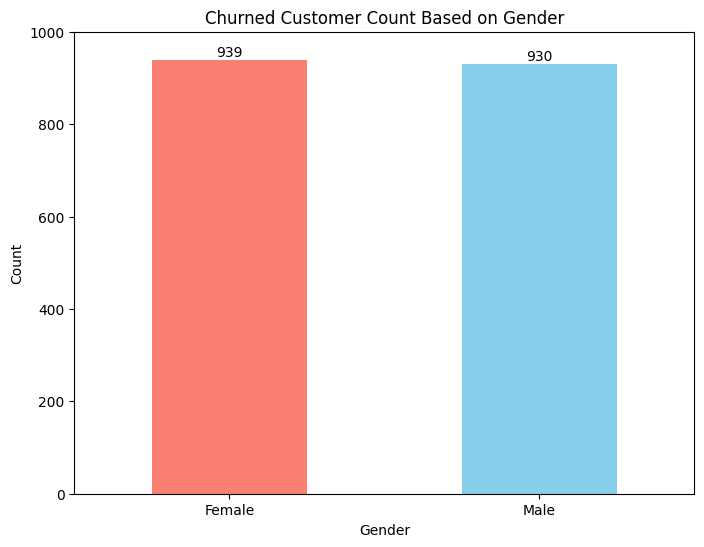

In [237]:
churned_customers = data[data["Churn"] == "Yes"]
genders = churned_customers["gender"].value_counts()
plt.figure(figsize=(8,6))
ax = genders.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Churned Customer Count Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

for i, value in enumerate(genders):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.yticks([0,200,400,600,800,1000])
plt.xticks(rotation = 0)
plt.show()

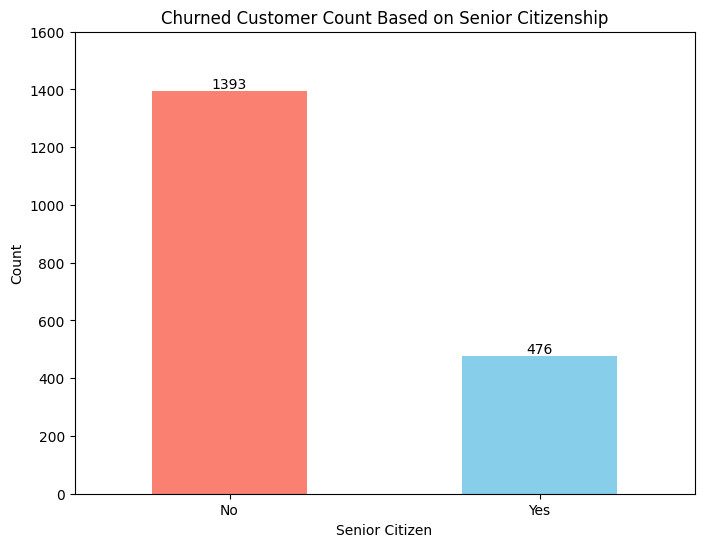

In [238]:
churned_customers = data[data["Churn"] == "Yes"]
seniors = churned_customers["SeniorCitizen"].value_counts()
plt.figure(figsize=(8,6))
ax = seniors.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Churned Customer Count Based on Senior Citizenship")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")

for i, value in enumerate(seniors):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.yticks([0,200,400,600,800,1000,1200,1400,1600])
plt.xticks(rotation = 0)
plt.show()

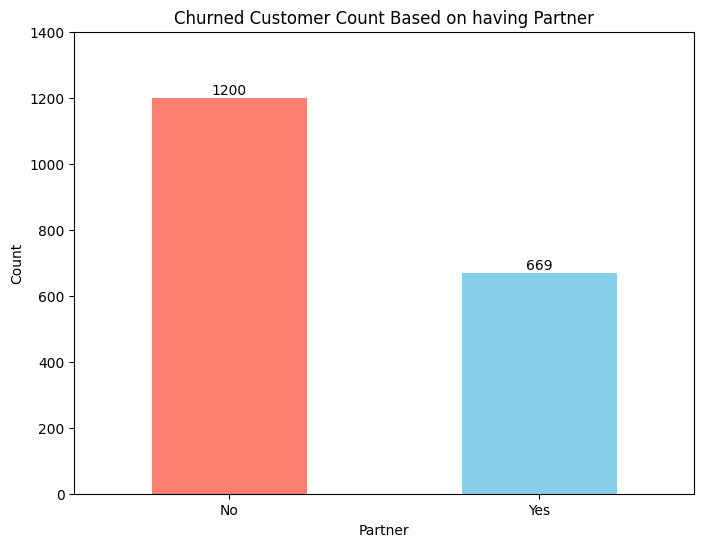

In [239]:
churned_customers = data[data["Churn"] == "Yes"]
partners = churned_customers["Partner"].value_counts()
plt.figure(figsize=(8,6))
ax = partners.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Churned Customer Count Based on having Partner")
plt.xlabel("Partner")
plt.ylabel("Count")

for i, value in enumerate(partners):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.yticks([0,200,400,600,800,1000,1200,1400])
plt.xticks(rotation = 0)
plt.show()

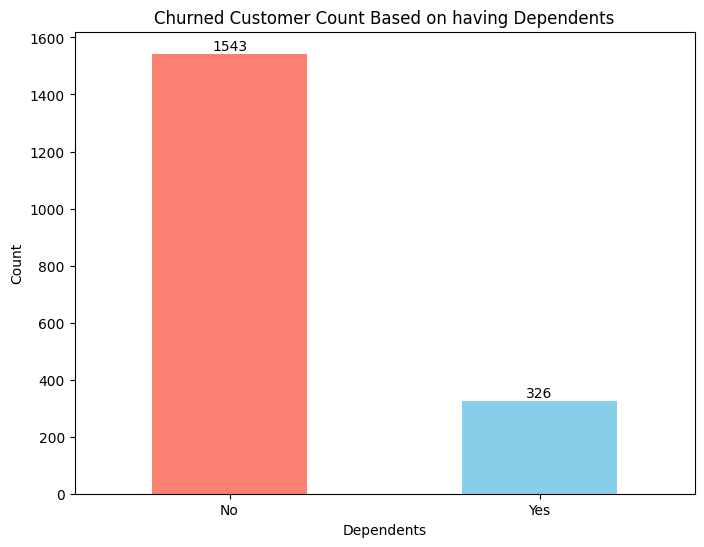

In [240]:
churned_customers = data[data["Churn"] == "Yes"]
dependents = churned_customers["Dependents"].value_counts()
plt.figure(figsize=(8,6))
ax = dependents.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Churned Customer Count Based on having Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")

for i, value in enumerate(dependents):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.yticks([0,200,400,600,800,1000,1200,1400,1600])
plt.xticks(rotation = 0)
plt.show()

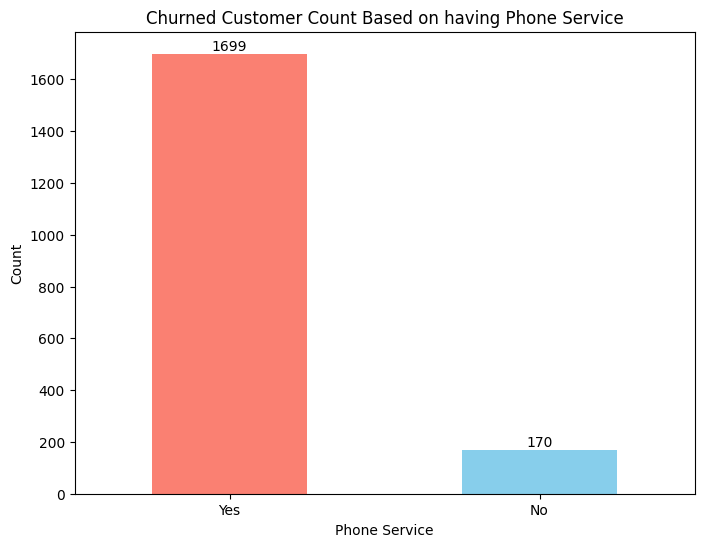

In [241]:
churned_customers = data[data["Churn"] == "Yes"]
service = churned_customers["PhoneService"].value_counts()
plt.figure(figsize=(8,6))
ax = service.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Churned Customer Count Based on having Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")

for i, value in enumerate(service):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.yticks([0,200,400,600,800,1000,1200,1400,1600])
plt.xticks(rotation = 0)
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

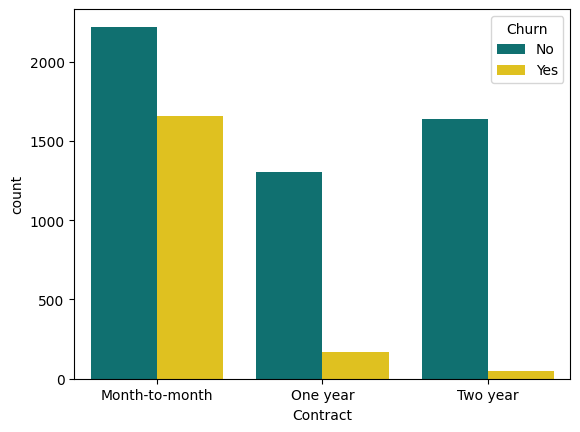

In [242]:
sns.countplot(data=data, x = "Contract", hue = "Churn", palette = ["teal","gold"])

<Axes: xlabel='PaymentMethod', ylabel='count'>

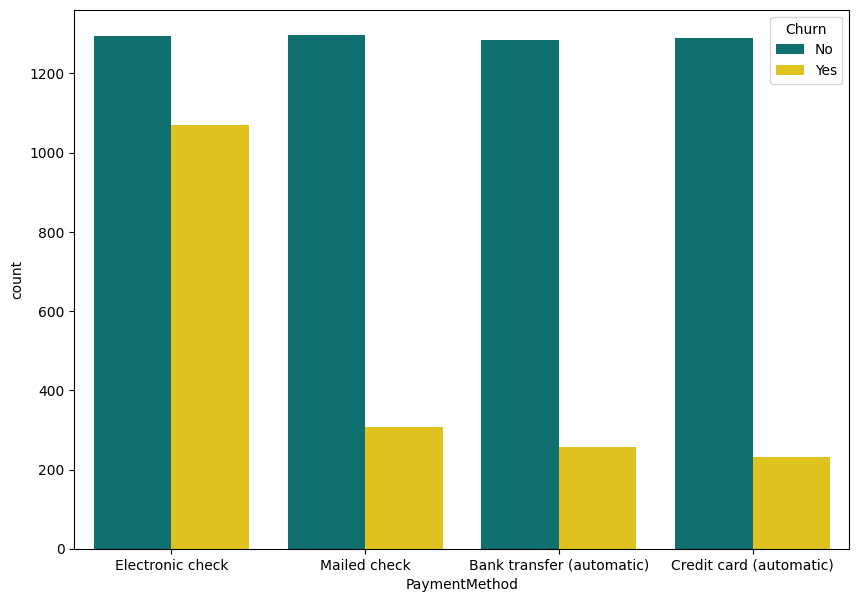

In [243]:
plt.figure(figsize = (10,7))
sns.countplot(data=data, x = "PaymentMethod", hue = "Churn", palette = ["teal","gold"])

<Axes: xlabel='InternetService', ylabel='count'>

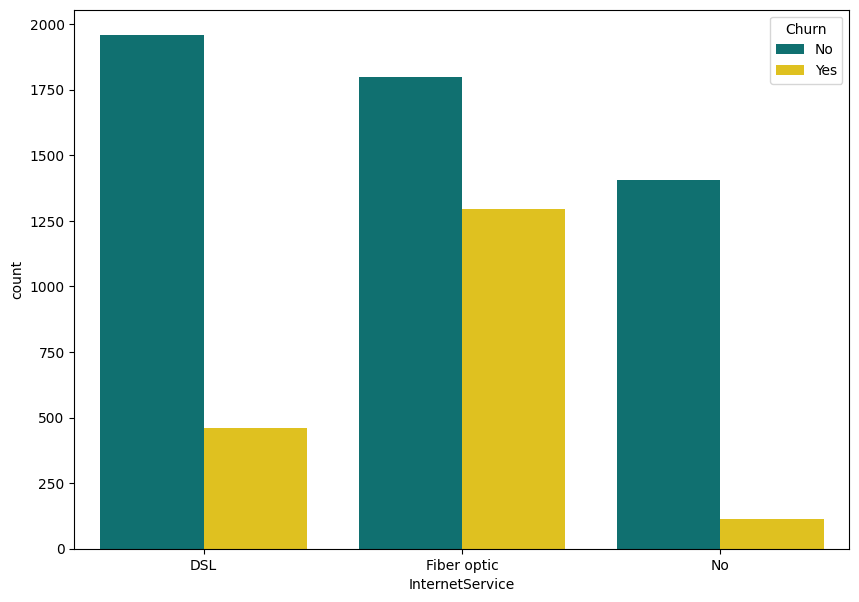

In [244]:
plt.figure(figsize = (10,7))
sns.countplot(data=data, x = "InternetService", hue = "Churn", palette = ["teal","gold"])

**Summary Insights:**  
- Churn is not strongly associated with gender, but senior citizens, customers without partners, and those without dependents are more likely to churn.
- Month-to-month contracts, electronic check payments, and fiber optic internet are all linked to higher churn rates.
- Customers with more stable relationships (longer contracts, dependents, partners) and those using additional services are less likely to churn.
- Service and contract features are more important predictors of churn than basic demographics.

<Axes: >

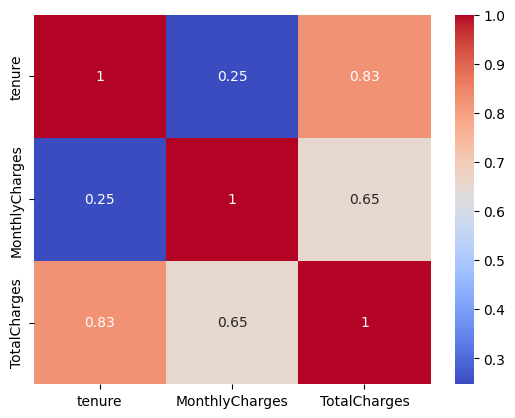

In [245]:
corr = data.select_dtypes(include = "number").corr(method = "pearson")
sns.heatmap(data = corr,annot=True,cmap = "coolwarm")

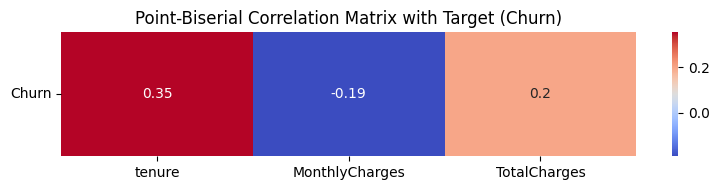

In [246]:
from scipy.stats import pointbiserialr

copy_data = data.copy()
copy_data["Churn"] = copy_data["Churn"].map({"Yes":0, "No":1})

features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # adjust this to your dataset

corr_values = [pointbiserialr(copy_data['Churn'], copy_data[feature])[0] for feature in features]

corr_matrix = pd.DataFrame([corr_values], columns=features, index=['Churn'])

plt.figure(figsize=(8, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Point-Biserial Correlation Matrix with Target (Churn)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Insight:**  
- Customers with shorter tenure are significantly more likely to churn, as shown by the strong negative correlation between tenure and churn.
- Higher monthly charges are associated with a higher likelihood of churn, indicating that expensive plans may be a risk factor.
- Customers with higher total charges (i.e., those who have been with the company longer) are less likely to churn, suggesting that loyalty increases over time.
- Tenure and total charges are, as expected, strongly positively correlated.

These findings reinforce the importance of customer retention strategies focused on new customers and those with high monthly charges.

In [247]:
from scipy.stats import chi2_contingency


target = "Churn"
results = []

for col in data.select_dtypes(exclude="number").columns:
    if col == target:
        continue
    contingency = pd.crosstab(data[col], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency)

    results.append({
        'Feature': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Significant': p < 0.05
    })

results_df = pd.DataFrame(results)
print(results_df[results_df["Significant"] == True], "\n")
print(results_df[results_df["Significant"] == False])

             Feature  Chi2 Statistic        p-value  Significant
2      SeniorCitizen      158.440816   2.479256e-36         True
3            Partner      157.503151   3.973798e-36         True
4         Dependents      186.321639   2.019659e-42         True
6      MultipleLines       11.271541   3.567927e-03         True
7    InternetService      728.695614  5.831199e-159         True
8     OnlineSecurity      846.677389  1.400687e-184         True
9       OnlineBackup      599.175185  7.776099e-131         True
10  DeviceProtection      555.880327  1.959389e-121         True
11       TechSupport      824.925564  7.407808e-180         True
12       StreamingTV      372.456502   1.324641e-81         True
13   StreamingMovies      374.268432   5.353560e-82         True
14          Contract     1179.545829  7.326182e-257         True
15  PaperlessBilling      256.874908   8.236203e-58         True
16     PaymentMethod      645.429900  1.426310e-139         True 

        Feature  Chi2 S

**Insight:**  
Features such as SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, Contract, and PaymentMethod are statistically significant predictors of churn.

## Feature Engineering

We create new features such as the total number of services a customer subscribes to, and encode categorical variables for modeling.

In [248]:
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

data['TotalServices'] = data[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)


In [249]:
yes_no_cols = ["SeniorCitizen","Partner","Dependents","PaperlessBilling","Churn"]
data[yes_no_cols] = data[yes_no_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
data["gender"] = data["gender"].map({'Female': 1, 'Male': 0})

In [250]:
cols = [col for col in data.columns if len(data[col].value_counts().index) <= 2]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [251]:
service_cols = ['PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    data[col] = data[col].map(lambda x: 1 if x == 'Yes' else 0)

In [252]:
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [253]:
data.drop(columns=["customerID","gender","PhoneService"],inplace=True)

In [254]:
data.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
TotalServices                              int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit

In [255]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,TotalCharges,Churn,TotalServices,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,29.85,0,1,False,False,False,False,False,True,False
1,0,0,0,34,0,1,0,1,0,0,...,1889.50,0,3,False,False,True,False,False,False,True
2,0,0,0,2,0,1,1,0,0,0,...,108.15,1,3,False,False,False,False,False,False,True
3,0,0,0,45,0,1,0,1,1,0,...,1840.75,0,3,False,False,True,False,False,False,False
4,0,0,0,2,0,0,0,0,0,0,...,151.65,1,1,True,False,False,False,False,True,False


## Modeling

We use Logistic Regression and Random Forest Classifier to predict churn. Data is split into training and test sets, and features are scaled appropriately.

In [256]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

X = data.drop('Churn', axis=1)
y = data['Churn']

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]
    
    print(f"\n----- {name} -----")
    print("Classification Report:\n", classification_report(y_test, preds))
    print("ROC-AUC Score:", roc_auc_score(y_test, proba))
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print("Cross-Validated ROC-AUC:", scores.mean())
    
    results[name] = {
        'model': model,
        'roc_auc': roc_auc_score(y_test, proba),
        'cv_roc_auc': scores.mean()
    }

best_model_name = max(results, key=lambda x: results[x]['cv_roc_auc'])
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")



----- Logistic Regression -----
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

ROC-AUC Score: 0.8316983398129119
Cross-Validated ROC-AUC: 0.8477297205373846

----- Random Forest -----
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

ROC-AUC Score: 0.8168656268280435
Cross-Validated ROC-AUC: 0.8247256796261956

Best Model: Logistic Regression


**Model Evaluation:**
- Logistic Regression achieved an ROC-AUC of 0.83.
- Random Forest achieved an ROC-AUC of 0.81.

The models show reasonable performance, with Logistic Regression performing best.

## Key Insights

- High monthly charges and short tenure are strong predictors of churn.
- Customers with fiber optic internet and month-to-month contracts are more likely to churn.
- Senior citizens and customers without dependents are at higher risk of churning.

## Recommendations

- Target high-risk customers with retention offers.
- Investigate pricing strategies for high-charge customers.
- Encourage customers to switch to longer-term contracts.

## Conclusion

By identifying key churn drivers, the business can proactively address customer concerns and improve retention rates. The predictive models developed here can be integrated into business processes to flag at-risk customers.